# Problem Statement

## Build a facial recognition system using autoencoders.
a) Use autoencoders or denoising autoencoders to extract features from the facial images.
 
b) Build a classifier that can recognize different faces in the dataset.

c) The goal is to achieve a high accuracy in recognizing the different faces in the dataset.


## Importing the Required Libraries 

In [1]:
import os
from PIL import Image
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
import matplotlib.pyplot as plt

### Loading the Dataset

In [2]:
#organized groups of 12 individuals into separate folders, including their respective images, 
# and assigned labels based on their names. Additionally, I resized the images to dimensions of 128 * 128.
folder_path = r"C:\Users\Ataf Mirza\Desktop\images" 
image_size = (128, 128)  # image size of 128 * 128

In [3]:
# Two variables that are initialized as empty lists.
images = []
labels = []

In [4]:
# iterates through the each folder, checks if each item is a subdirectory, and if so, 
# reads and resizes the images within that subdirectory, adding them to a list along with their corresponding label.
for label in os.listdir(folder_path):
    label_path = os.path.join(folder_path, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            images.append(image)
            labels.append(label)

In [5]:
# To work with the data in TensorFlow, it is converted to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [6]:
labels

array(['Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay',
       'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay',
       'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay',
       'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay',
       'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay',
       'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay',
       'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay',
       'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Abhay',
       'Abhay', 'Abhay', 'Abhay', 'Abhay', 'Atif', 'Atif', 'Atif', 'Atif',
       'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif',
       'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif',
       'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif',
       'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif',
       'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif', 'Atif',
       'At

### Label Encoding 

In [7]:
# converting the labels into numbers using label Encoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [8]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

### Split the data into train and test

In [9]:
#Train & Test Split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape, X_test.shape)

(559, 128, 128, 3) (140, 128, 128, 3)


## Data Preprocessing

#### Normalizing the pixel values

In [11]:
# Normalize pixel values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

By dividing the pixel values by 255 in the code, the image data is normalized to the range [0, 1]. This normalization step helps in improving the training process and the overall performance of the model on the images dataset.

#### Flatten the images into 1D arrays

In [12]:
# Flatten the images into 1D arrays
X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

In order to feed the data into an autoencoder, the images are flattened into 1D arrays.This code reshapes the training and test datasets by flattening the dimensions after the first dimension using the reshape function by multipliying 128 * 128 * 3 = 49152.






In [13]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(559, 49152)
(140, 49152)
(559,)
(140,)


#### Reshape the labels to match the classifier output shape

In [14]:
y_train_reshaped = y_train.reshape((y_train.shape[0], -1))
y_test_reshaped = y_test.reshape((y_test.shape[0], -1))

Reshapes the training and testing labels to match the expected shape of the classifier's
output by modifying the second dimension while keeping the first dimension intact.

### Auto-encoder training:

In [15]:
# The size of encoded representations
encoding_dim = 128  # Sizes of hidden layer
encoding_dim

128

In [16]:
# The size of actual representations
actual_dim = X_train.shape[1]
actual_dim

49152

actual_dim is set to the number of features in the flattened input data. It represents the size of the actual representations before encoding and decoding.

####  Autoencoder neural network architecture 


In [17]:
# It creates a sequence of dense layers to build the encoder and decoder parts of the autoencoder.
# The input image is passed through the encoder layers, compressed into a lower-dimensional representation,
# and then reconstructed back to its original dimension using the decoder layers.
# The activation functions used are ReLU for the encoder layers and sigmoid for the decoder's output layer.

# Input layer
input_img = Input(shape =(actual_dim,))
# Encoder layers
encoded = Dense(encoding_dim, activation='relu')(input_img)
hidden1 = Dense(256, activation='relu')(encoded)
hidden2 = Dense(128, activation='relu')(hidden1)
hidden3 = Dense(128, activation='relu')(hidden2)

# Decoder layers
hidden4 = Dense(256, activation='relu')(hidden3)
decoded = Dense(actual_dim, activation='sigmoid')(hidden3)

In [18]:
# Create the autoencoder model
autoencoder = Model(input_img, decoded)

In [19]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 49152)]           0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 49152)             6340608   
                                                                 
Total params: 12,714,624
Trainable params: 12,714,624
Non-tra

This autoencoder model takes an input of 49152 features, compresses it to a lower-dimensional representation of 128 features, and then attempts to reconstruct the original input shape. It has a total of 12,780,416 trainable parameters, and all the parameters are trainable, meaning they will be optimized during training.

## Define and compile the autoencoder model:

###### Autoencoder model with the Adam optimizer and mean squared error (MSE) loss function for training.

In [20]:
autoencoder.compile(optimizer='adam', loss='mse')

### Train the autoencoder Model for 70 epochs:

In [21]:
# As we can see that after increasing each Epoch the loss of training and validation decreases and after 65 to 70
# the loss is similiar. Therefore we will stop at 70 Epochs where we are getting loss: loss: 0.0026 - val_loss: 0.0027
# output shows a low training and validation loss, indicating that the autoencoder has learned to reconstruct the images effectively
history = autoencoder.fit(X_train, X_train, epochs=70, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/70
5/5 [==============================] - 4s 557ms/step - loss: 0.0852 - val_loss: 0.0410
Epoch 2/70
5/5 [==============================] - 3s 505ms/step - loss: 0.0388 - val_loss: 0.0350
Epoch 3/70
5/5 [==============================] - 2s 502ms/step - loss: 0.0345 - val_loss: 0.0311
Epoch 4/70
5/5 [==============================] - 3s 612ms/step - loss: 0.0325 - val_loss: 0.0314
Epoch 5/70
5/5 [==============================] - 3s 518ms/step - loss: 0.0321 - val_loss: 0.0306
Epoch 6/70
5/5 [==============================] - 2s 474ms/step - loss: 0.0315 - val_loss: 0.0303
Epoch 7/70
5/5 [==============================] - 2s 458ms/step - loss: 0.0312 - val_loss: 0.0300
Epoch 8/70
5/5 [==============================] - 2s 499ms/step - loss: 0.0307 - val_loss: 0.0293
Epoch 9/70
5/5 [==============================] - 2s 450ms/step - loss: 0.0294 - val_loss: 0.0269
Epoch 10/70
5/5 [==============================] - 2s 487ms/step - loss: 0.0255 - val_loss: 0.0238
Epoch 11/70
5/5 [==

In [22]:
# trained autoencoder model to make predictions on the X_test data and stores the predicted 
# values in the encoded_imgs variable.
encoded_imgs = autoencoder.predict(X_test)

5/5 [==============================] - 0s 25ms/step


In [23]:
# # shape of encoded images
encoded_imgs[1].shape

(49152,)

## Visualization and Analysis

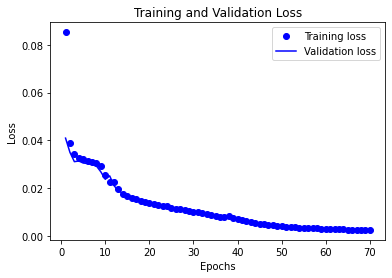

In [24]:
# The graph shows the training and validation loss over epochs for a machine learning model. 
# The x-axis represents the epochs, and the y-axis represents the loss. The blue dots represent
# the training loss, and the solid blue line represents the validation loss.
#from this graph we can see that after each epoch the training and the validation loss is continously decreasing

from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Generating reconstructed images for visualization

5/5 [==============================] - 0s 30ms/step


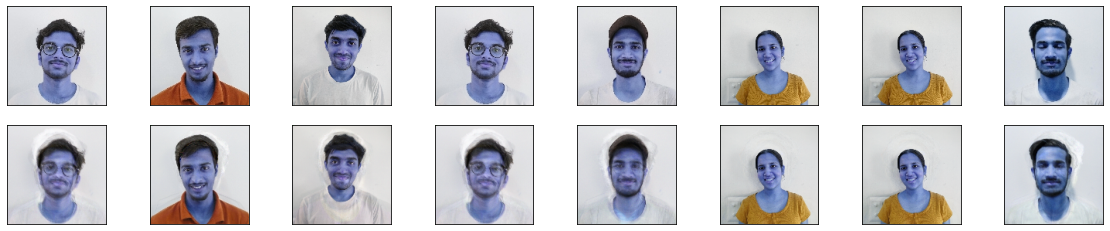

In [25]:
# This code uses an autoencoder model to reconstruct images. It predicts the reconstructed images for the test data,
# and then displays both the original and reconstructed images side by side in a plot.

decoded_imgs = autoencoder.predict(X_test)

n = 8  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Classification of Images on 

In [26]:
# Create a classifier on top of the trained encoder
encoder = keras.Model(input_img, encoded)

#### Neural Network model for classification.

In [27]:
# Training the classifier
# creates a classification model by connecting a dense layer with 64 units and softmax activation to the hidden3 layer.
#  Add classification layers on top of the encoder
classification_layer = Dense(64, activation='softmax')(hidden3)
classifier = keras.Model(encoder.input, classification_layer)

In [28]:
# Compiles a classifier model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric.
# Then it trains the model using X_train and y_train for 10 epochs with a batch size of 32.
# with increasing in the epoch the loss is decreasing and the  accuracy increasing 

# Compile and train the classifier
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
18/18 [==============================] - 4s 138ms/step - loss: 6.0272 - accuracy: 0.1950
Epoch 2/20
18/18 [==============================] - 3s 148ms/step - loss: 1.5614 - accuracy: 0.5277
Epoch 3/20
18/18 [==============================] - 3s 158ms/step - loss: 0.8529 - accuracy: 0.6923
Epoch 4/20
18/18 [==============================] - 3s 155ms/step - loss: 0.4570 - accuracy: 0.8569
Epoch 5/20
18/18 [==============================] - 3s 140ms/step - loss: 0.2351 - accuracy: 0.9642
Epoch 6/20
18/18 [==============================] - 3s 149ms/step - loss: 0.0787 - accuracy: 0.9928
Epoch 7/20
18/18 [==============================] - 2s 138ms/step - loss: 0.0283 - accuracy: 1.0000
Epoch 8/20
18/18 [==============================] - 3s 146ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 9/20
18/18 [==============================] - 3s 163ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 10/20
18/18 [==============================] - 3s 158ms/step - loss: 0.0072 - accuracy: 1.0000

In [29]:
prediction = classifier.predict(X_test)

5/5 [==============================] - 0s 17ms/step


### Evaluate the model

In [30]:
# Evaluates the performance of the classifier model on the test data and prints the corresponding loss and accuracy values.
loss, accuracy = classifier.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

5/5 [==============================] - 0s 14ms/step - loss: 0.0013 - accuracy: 1.0000
Test loss: 0.0012700265506282449
Test accuracy: 1.0


These values indicate the performance of the classifier on the test dataset. The low test loss suggests that the classifier's predictions were very close to the true labels, while the test accuracy of 1.0 indicates that all the labels in the test dataset were correctly predicted by the classifier.

In [31]:
# Creating a dicitonary of names and Assignin label
names = {0: "Abhay",1: "Atif",2: "Bhanu",3: "Dhwani",4: "Hashika",5: "Mustafa",6: "Prasad",7: "Rahul",8: "Salman",9: "Shivansh",10: "Swajit ",11: "Yugandhar"}

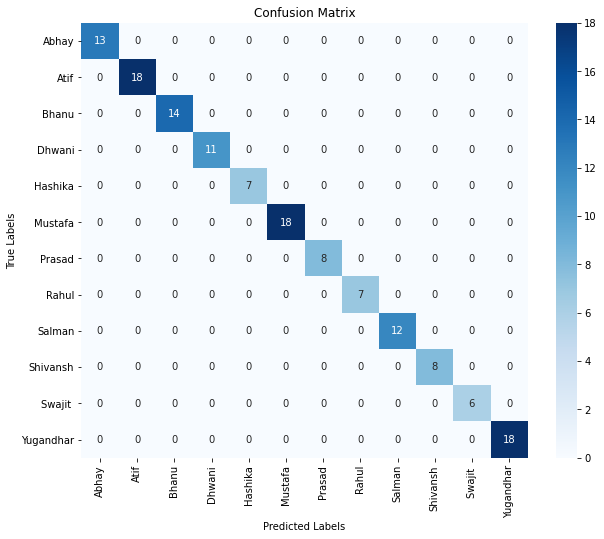

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for test data
predictions = np.argmax(prediction, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=names.values(), yticklabels=names.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


All the non-diagonal elements are 0 suggests that the model has achieved perfect classification for those specific classes. This means that the model did not make any misclassifications for those particular classes.

In [33]:
# Get the predictions for the test set
predictions = np.argmax(prediction, axis=1)

# Count the occurrences of each class
class_counts = np.bincount(predictions)
# Print the counts per person
for i in range(len(class_counts)):
    person_name = names[i]
    count = class_counts[i]
    print(f"{person_name}: {count} images")

Abhay: 13 images
Atif: 18 images
Bhanu: 14 images
Dhwani: 11 images
Hashika: 7 images
Mustafa: 18 images
Prasad: 8 images
Rahul: 7 images
Salman: 12 images
Shivansh: 8 images
Swajit : 6 images
Yugandhar: 18 images


In [34]:
print(f" X_test {predictions.shape}")

 X_test (140,)


In [35]:
type(X_test)

numpy.ndarray

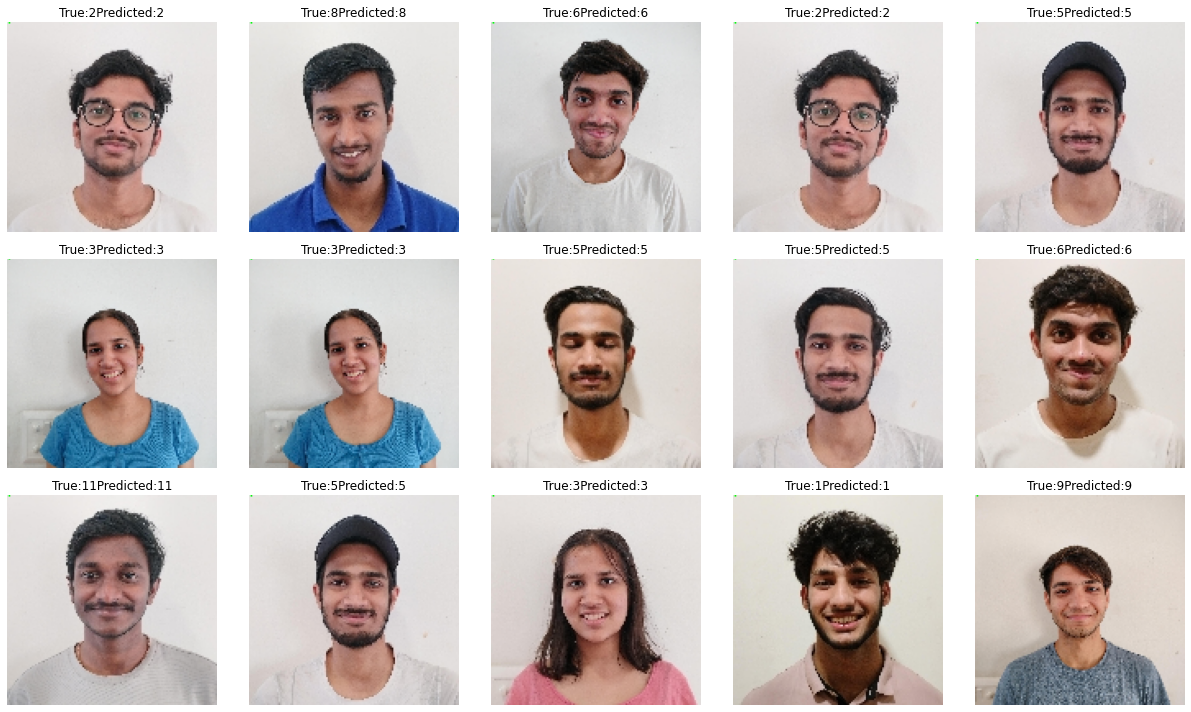

Accuracy: 1.000


In [36]:
# visualizes asubset of the test images along with their true labels and predicted labels.
# For each image, the predicted label is obtained by finding the index with the highest
# probability in the prediction array. The true_label is the corresponding true label
# from y_test. The number of correct predictions is also counted.
correct = 0
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(17, 10))

for i in range(len(X_test)):
    predicted_label = np.argmax(prediction[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        correct += 1

    if i < 15:
        img = X_test[i].reshape(128, 128, 3)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axs[i // 5, i % 5]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"True:"+  str(true_label) + "Predicted:" + str(predicted_label))
        

plt.tight_layout()
plt.show()

accuracy = correct / float(len(X_test))
print("Accuracy: {:.3f}".format(accuracy))

The test loss and test accuracy of the classifier are both quite good, with a test accuracy of 1.0 indicating that the classifier accurately predicts the labels of the test images. This suggests that the facial recognition system is performing well on the given dataset.

### Conclusion:

achieved a high accuracy of 1.0 in recognizing different faces in the dataset. The loss and validation loss during training were reduced to loss: 0.0017 - val_loss: 0.0018, indicating the effectiveness of the autoencoder in extracting informative features.

Overall, the developed facial recognition system demonstrates the capability of autoencoders for feature extraction and their integration with a classifier for accurate face recognition. Further improvements can be made by exploring techniques such as architectural adjustments, data augmentation, and parameter tuning to enhance the system's performance.

